IMPORTING LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dee=pd.read_csv("/content/submission (3).csv")
dee['will_go_to_college'].value_counts()

False    102
True      98
Name: will_go_to_college, dtype: int64

In [ ]:
dee1=pd.read_csv("/content/submission (5).csv")
dee1['will_go_to_college'].value_counts()

False    104
True      96
Name: will_go_to_college, dtype: int64

DATA EXPLORATION AND ANALYSIS

In [ ]:
#Load the dataset

train_data=pd.read_csv('/content/Train.csv')
test_data=pd.read_csv('/content/Test.csv')

In [ ]:
#Exploring the data

train_data.info()

test_data.info()

train_data.describe()

test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UniqueID               800 non-null    int64  
 1   type_school            735 non-null    object 
 2   school_accreditation   727 non-null    object 
 3   gender                 737 non-null    object 
 4   interest               738 non-null    object 
 5   residence              742 non-null    object 
 6   parent_age             729 non-null    float64
 7   parent_salary          730 non-null    float64
 8   house_area             740 non-null    float64
 9   average_grades         727 non-null    float64
 10  parent_was_in_college  727 non-null    object 
 11  will_go_to_college     800 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 

,UniqueID,parent_age,parent_salary,house_area,average_grades
count,200.000000,183.000000,1.900000e+02,175.000000,181.000000
mean,508.825000,52.540984,5.216947e+06,74.677143,86.001215
std,286.603686,3.910708,1.447989e+06,15.436926,3.392537
min,11.000000,40.000000,1.000000e+06,20.000000,75.000000
25%,273.500000,50.000000,4.092500e+06,64.950000,83.640000
50%,527.500000,53.000000,5.365000e+06,74.700000,85.420000
75%,744.000000,55.000000,6.317500e+06,84.950000,88.300000
max,999.000000,62.000000,8.400000e+06,112.500000,98.000000


In [ ]:
#Shape of the dataframe

print("training data size:" ,train_data.shape)

print("testing data size : ",test_data.shape)


training data size: (800, 12)
testing data size :  (200, 11)


In [ ]:
train_data.head()

,UniqueID,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,30,Vocational,B,Female,Uncertain,Rural,50.0,6450000.0,78.4,85.86,True,False
1,536,Vocational,A,Male,Very Interested,Urban,54.0,5450000.0,70.3,NaN,False,True
2,696,Vocational,A,Female,Very Interested,Urban,52.0,5520000.0,82.5,84.59,False,True
3,558,Academic,A,Male,Not Interested,Rural,41.0,3020000.0,50.6,77.18,True,False
4,837,Vocational,B,Male,Uncertain,Rural,52.0,6120000.0,65.8,84.55,True,False


In [ ]:
# checking for nulll values in train and test data

print("train data null count:",train_data.isna().any())

print("test data null count: ",test_data.isna().any())


train data null count: UniqueID                 False
type_school               True
school_accreditation      True
gender                    True
interest                  True
residence                 True
parent_age                True
parent_salary             True
house_area                True
average_grades            True
parent_was_in_college     True
will_go_to_college       False
dtype: bool
test data null count:  UniqueID                 False
type_school               True
school_accreditation      True
gender                    True
interest                  True
residence                 True
parent_age                True
parent_salary             True
house_area                True
average_grades            True
parent_was_in_college     True
dtype: bool


In [ ]:
#Handling Null values for training data
from sklearn.impute import SimpleImputer
numerical_train=train_data.select_dtypes(include=[np.number]).columns
categorical_train=train_data.select_dtypes(exclude=[np.number]).columns

n_imp=SimpleImputer(missing_values=np.nan,strategy='mean')
c_imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

train_data[numerical_train]=pd.DataFrame(n_imp.fit_transform(train_data[numerical_train]),columns=numerical_train)
train_data[categorical_train]=pd.DataFrame(c_imp.fit_transform(train_data[categorical_train]),columns=categorical_train)




In [ ]:
#Handling Null values for testing data
from sklearn.impute import SimpleImputer
numerical_test=test_data.select_dtypes(include=[np.number]).columns
categorical_test=test_data.select_dtypes(exclude=[np.number]).columns

n_imp=SimpleImputer(missing_values=np.nan,strategy='mean')
c_imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

test_data[numerical_test]=pd.DataFrame(n_imp.fit_transform(test_data[numerical_test]),columns=numerical_test)
test_data[categorical_test]=pd.DataFrame(c_imp.fit_transform(test_data[categorical_test]),columns=categorical_test)



In [ ]:
#Again checking for Null values
print("train data null count:",train_data.isna().any())

print("test data null count: ",test_data.isna().any())


train data null count: UniqueID                 False
type_school              False
school_accreditation     False
gender                   False
interest                 False
residence                False
parent_age               False
parent_salary            False
house_area               False
average_grades           False
parent_was_in_college    False
will_go_to_college       False
dtype: bool
test data null count:  UniqueID                 False
type_school              False
school_accreditation     False
gender                   False
interest                 False
residence                False
parent_age               False
parent_salary            False
house_area               False
average_grades           False
parent_was_in_college    False
dtype: bool


In [ ]:
# Checking duplicates

print(train_data.duplicated().sum())

print(test_data.duplicated().sum())

0
0


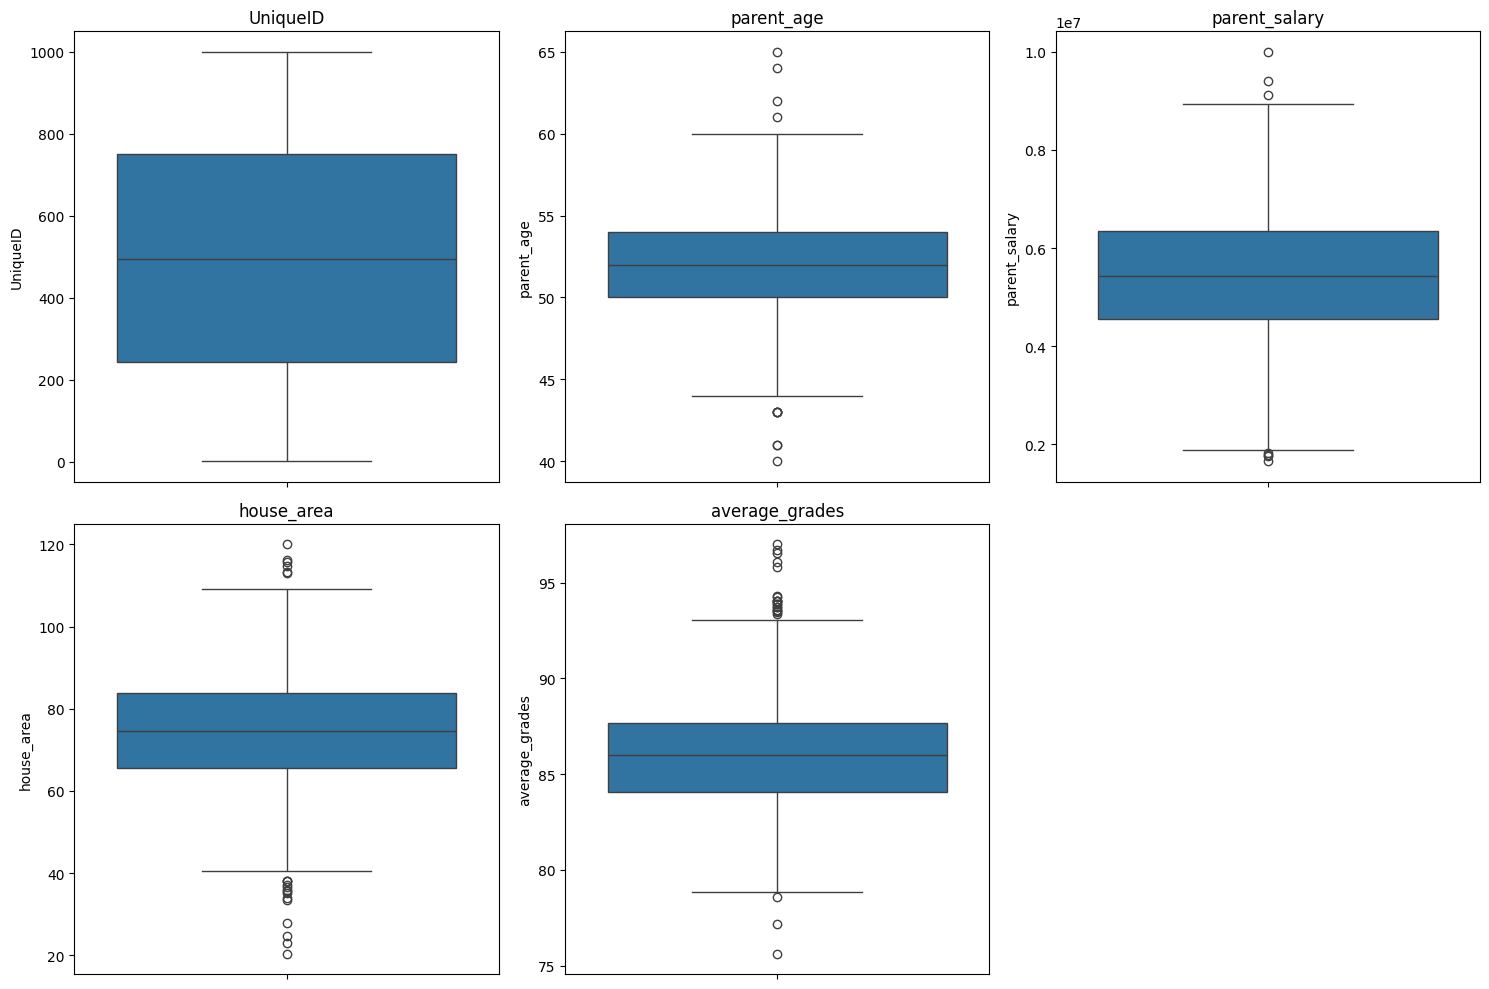

In [ ]:
#checking for outliers in trainig data
import seaborn as sns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

OUTLIERS IN : AVERAGE GRADE , PARENT AGE , PARENT SALARY , HOUSING AREA

In [ ]:
outliers = ['house_area', 'average_grades','parent_age','parent_salary']

Q1 = train_data[outliers].quantile(0.25)
Q3 = train_data[outliers].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data[outliers] = np.where(train_data[outliers] < lower_bound, lower_bound,
                        np.where(train_data[outliers] > upper_bound, upper_bound,
                                 train_data[outliers]))

AFTER HANDLING OUTLIERS

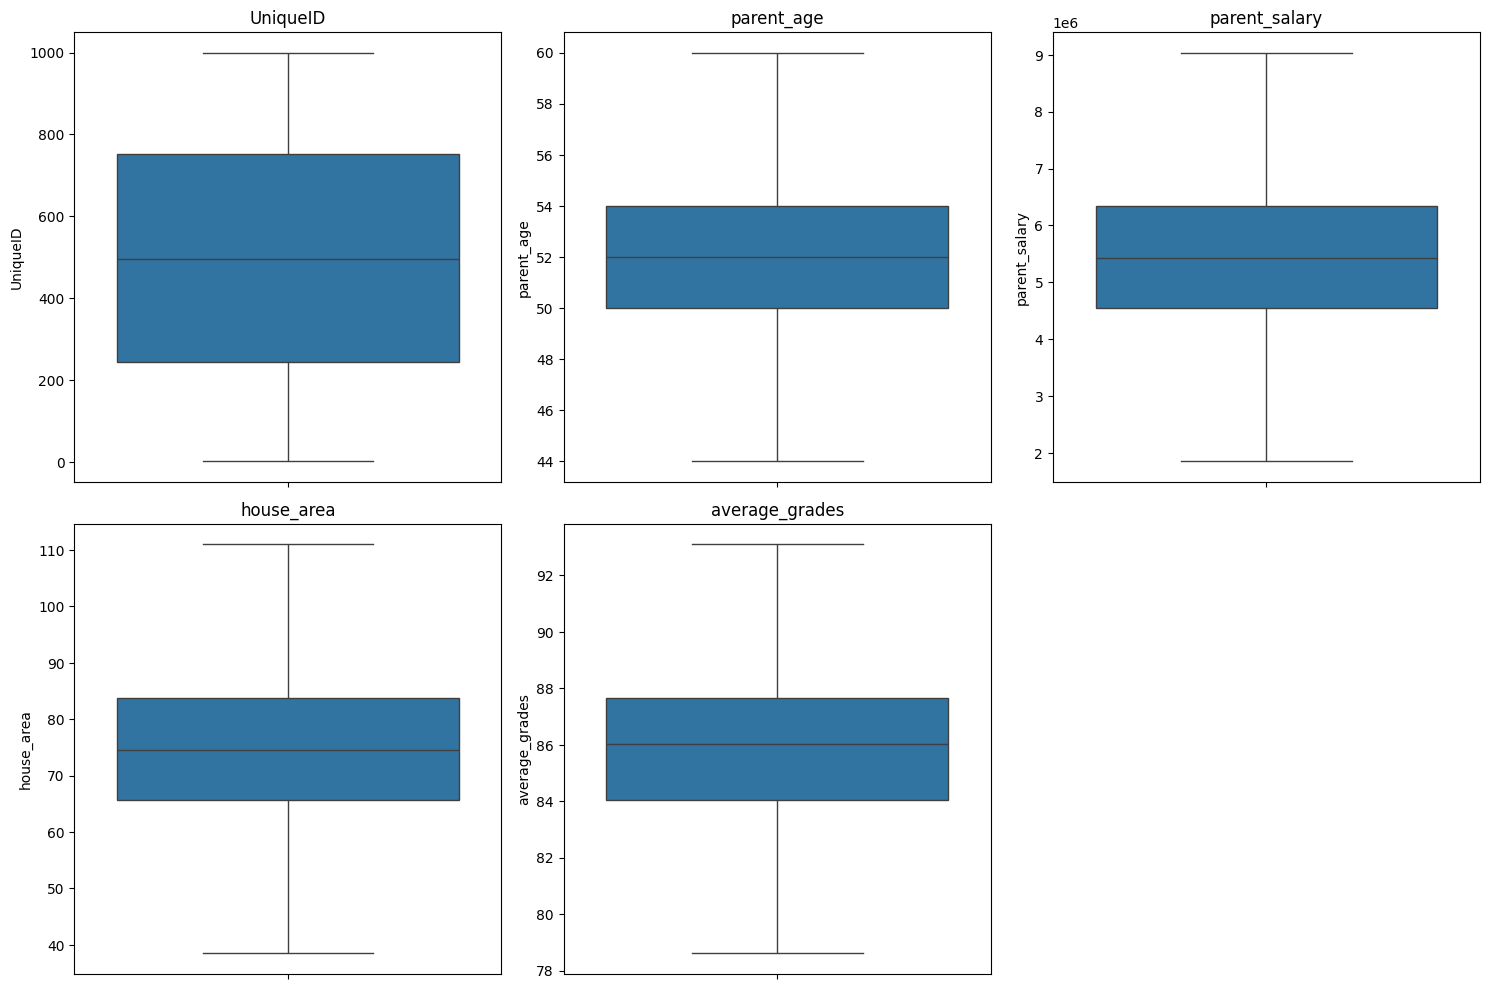

In [ ]:
#checking for outliers in trainig data
import seaborn as sns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

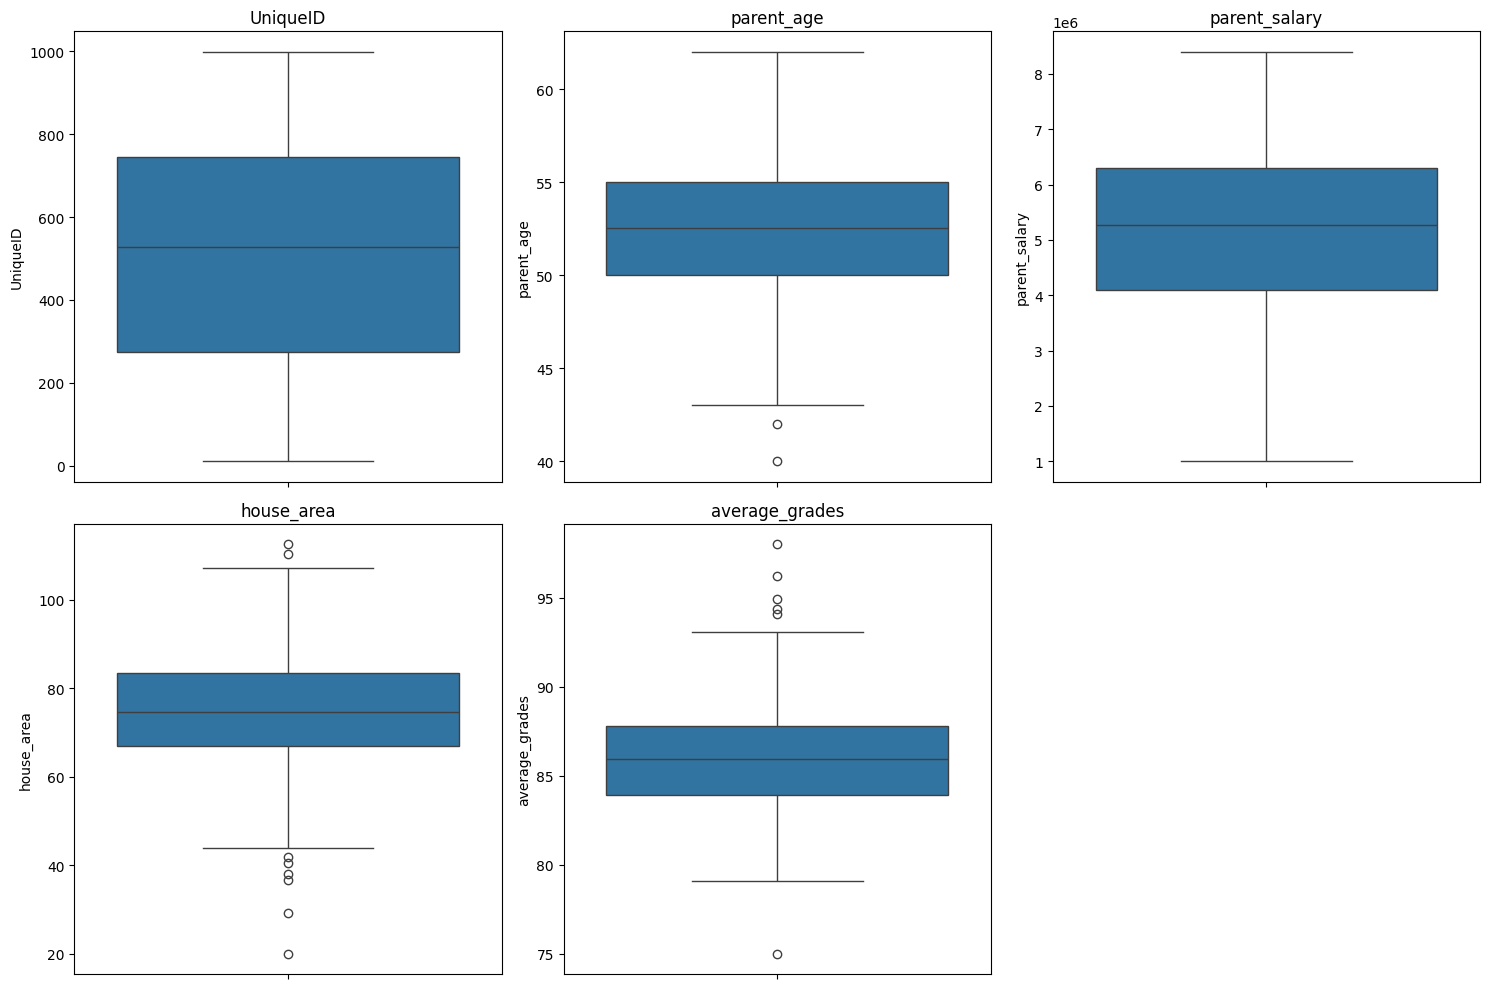

In [ ]:
#checking for outliers in testing data
import seaborn as sns
numerical_columns = test_data.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=test_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
outliers = ['house_area', 'average_grades','parent_age','parent_salary']

Q1 = test_data[outliers].quantile(0.25)
Q3 = test_data[outliers].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

test_data[outliers] = np.where(test_data[outliers] < lower_bound, lower_bound,
                        np.where(test_data[outliers] > upper_bound, upper_bound,
                                 test_data[outliers]))
test_data.shape

(200, 11)

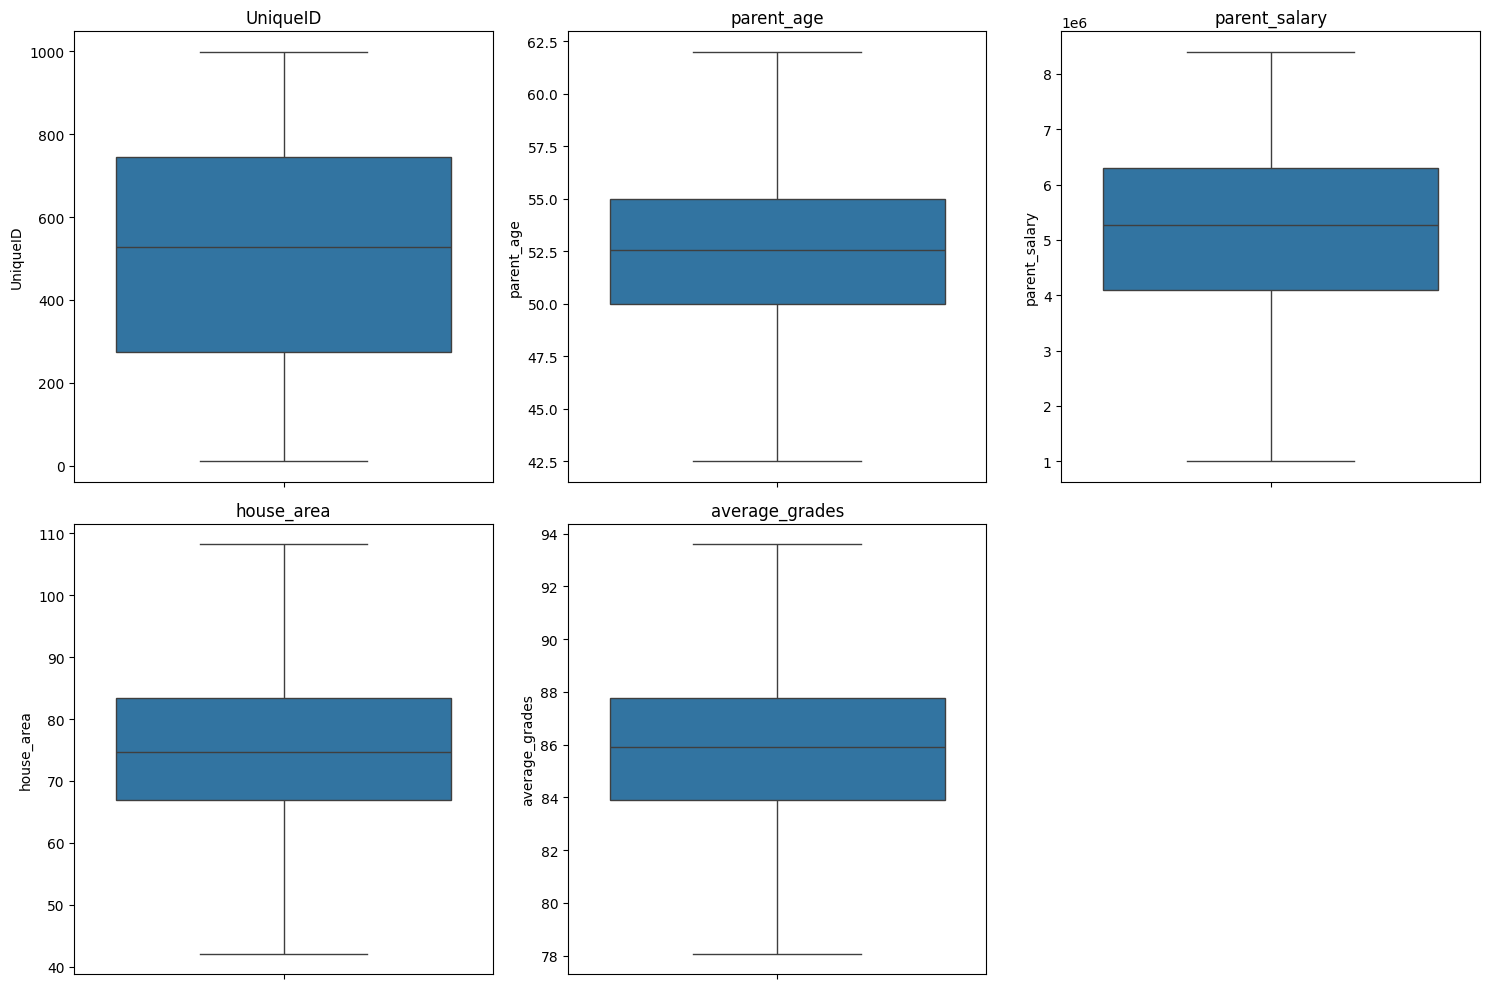

In [ ]:
#checking for outliers in testing data
import seaborn as sns
numerical_columns = test_data.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=test_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

LABEL ENCODING FOR CATEGORICAL DATA

In [ ]:
# Separate numerical and categorical data
num_train_data = train_data.select_dtypes(include=np.number)
cat_train_data = train_data.select_dtypes(exclude = np.number)

num_test_data=test_data.select_dtypes(include=np.number)
cat_test_data=test_data.select_dtypes(exclude=np.number)
print(num_train_data)
print(cat_train_data)

     UniqueID  parent_age  parent_salary  house_area  average_grades
0        30.0        50.0      6450000.0        78.4       85.860000
1       536.0        54.0      5450000.0        70.3       86.131499
2       696.0        52.0      5520000.0        82.5       84.590000
3       558.0        44.0      3020000.0        50.6       78.606250
4       837.0        52.0      6120000.0        65.8       84.550000
..        ...         ...            ...         ...             ...
795     107.0        49.0      6370000.0        97.9       85.370000
796     271.0        47.0      3040000.0        85.3       85.930000
797     861.0        53.0      4060000.0        62.8       88.070000
798     436.0        47.0      3940000.0        52.2       83.410000
799     103.0        52.0      5570000.0        96.9       85.810000

[800 rows x 5 columns]
    type_school school_accreditation  gender         interest residence  \
0    Vocational                    B  Female        Uncertain     Rural  

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in cat_train_data.columns:
  labelencoder.fit(train_data[col])
  train_data[col]= labelencoder.transform(train_data[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in cat_test_data.columns:
  labelencoder.fit(test_data[col])
  test_data[col]= labelencoder.transform(test_data[col])

FEATURE ENGINEERING

In [ ]:
#normalising the range of the values for train data
from sklearn.preprocessing import MinMaxScaler

minmaxscaler=MinMaxScaler()

for col in train_data.columns:
  if col!='will_go_to_college':
    minmaxscaler.fit(train_data[[col]])
    train_data[col]= minmaxscaler.transform(train_data[[col]])

In [ ]:
#normalising the range of the values for test data
from sklearn.preprocessing import MinMaxScaler

minmaxscaler=MinMaxScaler()

for col in test_data.columns:
  if col!='will_go_to_college':
    minmaxscaler.fit(test_data[[col]])
    test_data[col]= minmaxscaler.transform(test_data[[col]])

CORRELATION

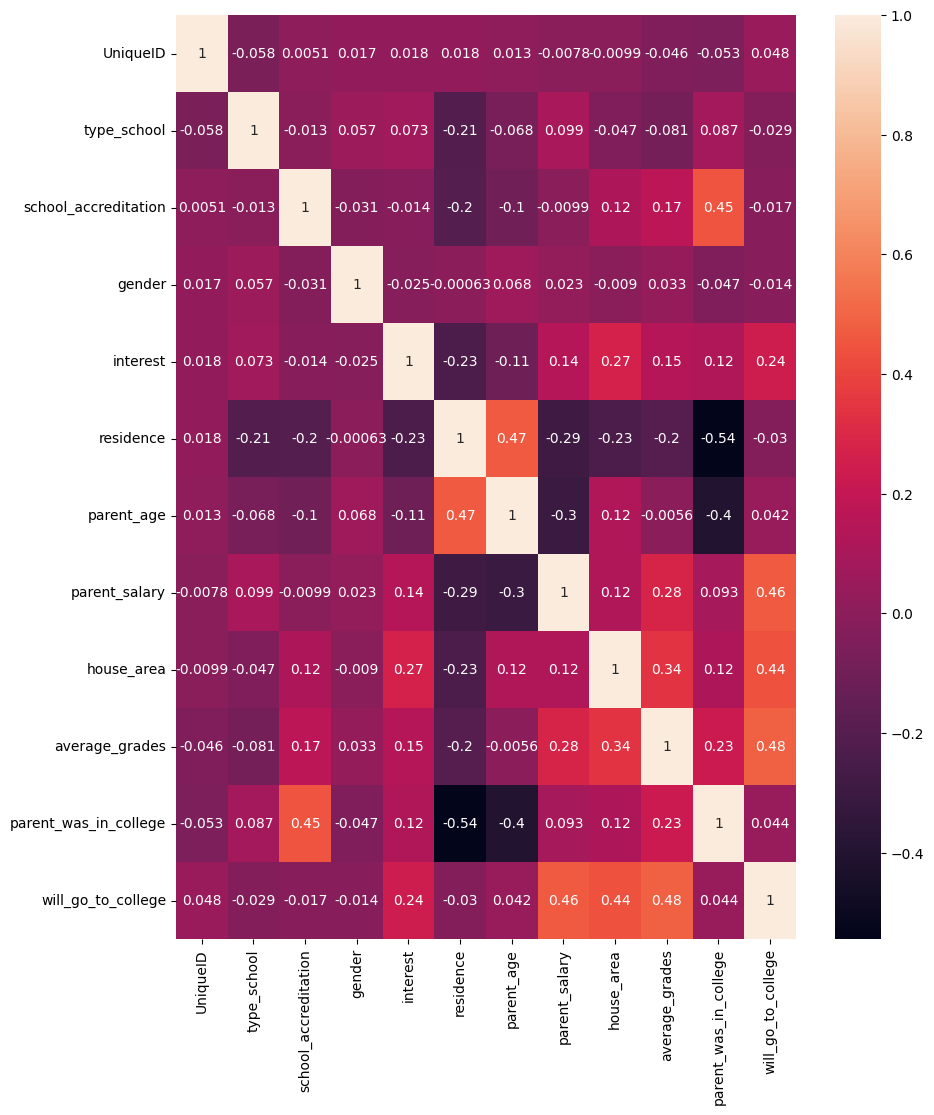

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

MODEL SELECTION

In [ ]:
# split data as train and test

from sklearn.model_selection import train_test_split
y = train_data['will_go_to_college']
inputs=['average_grades','parent_salary','house_area','interest']
x=train_data[inputs]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.33, random_state = 72)
print(train_x.shape)
test_x.shape

(536, 4)


(264, 4)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
logreg_ypred = logreg.predict(test_x)
logreg_ypred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import f1_score

f1_score(test_y, logreg_ypred)


0.8137931034482758

XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_x, train_y)
xgb_ypred = xgb.predict(test_x)
xgb_ypred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import f1_score
f1_score(test_y, xgb_ypred)

0.872852233676976

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN classifier
knn = KNeighborsClassifier()

# Fit KNN classifier on training data
knn.fit(train_x, train_y)

# Make predictions on test data
knn_ypred = knn.predict(test_x)

# View the predictions
print(knn_ypred)

[1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1
 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1
 0 1 1 0 0]


In [ ]:
from sklearn.metrics import f1_score
f1_score(test_y, knn_ypred)

0.7913669064748201

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Fit Decision Tree classifier on training data
decision_tree.fit(train_x, train_y)

# Make predictions on test data
decision_tree_ypred = decision_tree.predict(test_x)

In [ ]:
from sklearn.metrics import f1_score
f1_score(test_y,decision_tree_ypred)

0.8

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest classifier
random_forest = RandomForestClassifier()

# Fit Random Forest classifier on training data
random_forest.fit(train_x, train_y)

# Make predictions on test data
random_forest_ypred = random_forest.predict(test_x)

In [ ]:
from sklearn.metrics import f1_score
f1_score(test_y,random_forest_ypred)

0.8650519031141868

SVM

In [ ]:
from sklearn.svm import SVC

# Instantiate Support Vector Machines classifier
svm = SVC()

# Fit SVM classifier on training data
svm.fit(train_x, train_y)

# Make predictions on test data
svm_ypred = svm.predict(test_x)

In [ ]:
from sklearn.metrics import f1_score
f1_score(test_y,svm_ypred)

0.8370370370370371

GRID SEARCH

In [ ]:
#Tweak the parameters n_estimators, max_depth ,learning_rate

from sklearn.model_selection import GridSearchCV
paramdict = {'n_estimators':[100, 300, 500], 'max_depth':[3,5,7], 'learning_rate':[0.1, 0.01]}
gridsearch = GridSearchCV(estimator=xgb, param_grid=paramdict, cv = 5)
gridsearch.fit(train_x, train_y)
xgb_gsv_ypred = gridsearch.predict(test_x)

In [ ]:
f1_score(test_y, xgb_gsv_ypred)

0.8482758620689655

CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, xgb_gsv_ypred)

array([[ 97,  31],
       [ 13, 123]])

ROC CURVE

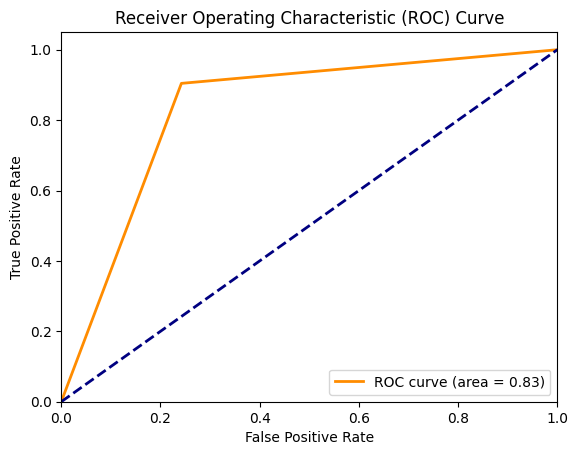

In [ ]:
# ROC Curve

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y, xgb_gsv_ypred)

# Compute Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()